# 📝 Overview

**CatBoost (Categorical Boosting Machine)** is a high-performance gradient boosting algorithm optimized for working with categorical features, delivering **speed, accuracy, and efficiency**. It is based on **Ordered Boosting** and provides excellent results for **tabular data**, especially when dealing with **categorical features** without requiring extensive preprocessing.

CatBoost is widely used in **competitive ML**, including **finance, recommendation systems, ranking problems, and forecasting**.

---

## 🤔 What is CatBoost?

CatBoost is a **gradient boosting** method that builds **decision trees** in a boosting framework. Unlike XGBoost and LightGBM, it implements **Ordered Boosting** and **Permutation-based handling** of categorical variables, which **reduces overfitting** and **improves accuracy** in complex datasets.

---

## 🔄 How it Works:

### 🟢 Boosting (Gradient Boosting Algorithm):
- Trees are built **sequentially**, improving on previous models.
- Uses **gradient descent** to minimize the loss function.
- Implements **Ordered Boosting** to prevent overfitting.

### 🚀 Overfitting Reduction:
- **Ordered Target Statistics** prevent **data leakage** in categorical features.
- **L2 (Ridge) regularization** for penalizing complex models.
- **Early stopping** prevents unnecessary training iterations.

### ⚡ High Performance:
- **Efficient GPU & CPU computation** speeds up training.
- **Handles categorical features natively**, reducing preprocessing time.
- **Optimized for tabular data** without manual feature engineering.

### 🌍 Wide Application:
- Works well for **regression, classification, ranking, recommendation systems, and forecasting**.

---

## 🔢 Popular Measures in CatBoost:

✅ **Learning Rate (𝛼, η)** – Controls the step size in gradient descent (lower values prevent overfitting).  
✅ **Depth (d)** – Limits the depth of trees, balancing bias-variance tradeoff.  
✅ **Iterations (n_estimators)** – Defines the number of trees in the ensemble.  
✅ **L2 Regularization (𝜆)** – Ridge regularization to penalize overfitting.  
✅ **Bagging Temperature (T)** – Controls randomness in sampling, improving generalization.  
✅ **Boosting Type** – **Plain** (fast but prone to overfitting) vs. **Ordered** (default, better generalization).

---

## ✅ Key Strengths & ❌ Limitations:

### ✅ Strengths:
- **🚀 High Accuracy:** Performs well on **structured/tabular data**.
- **📊 Handles Categorical Features:** **Built-in encoding**, eliminating preprocessing.
- **⏳ Fast Computation:** Optimized implementation for **multi-core processing (CPU/GPU)**.
- **🧠 Smart Regularization:** **Ordered Boosting** reduces **overfitting**.
- **🔎 Excellent for Missing Data:** Handles missing values **automatically**.

### ❌ Limitations:
- **🔧 Sensitive to Hyperparameters:** Needs **tuning** for best results.
- **🖥️ High Memory Usage:** **More memory-intensive** compared to XGBoost/LightGBM.
- **⚠️ Not Ideal for Very Small Datasets:** May overfit if the dataset is too small.

---


# 🔴 CatBoost Formula

CatBoost is based on **Ordered Gradient Boosting**, where each new tree corrects the errors of the previous ones while preserving an unbiased estimation of gradients. The main objective function consists of:

$$
L(\Theta) = \sum_{i=1}^{n} l(y_i, f(x_i, \Theta)) + \Omega(f)
$$

where:

- \($ l(y_i, f(x_i, \Theta)) $) is the **loss function** measuring prediction error.
- \( $Omega(f) $) is the **regularization term** controlling model complexity.

---

## 🎯 Loss Function:

CatBoost minimizes a differentiable loss function, such as:

### 🟢 Mean Squared Error (MSE) for Regression:
$$
L(y, f(x)) = \frac{1}{n} \sum_{i=1}^{n} (y_i - f(x_i))^2
$$

### 🔵 Log Loss for Classification:
$$
L(y, f(x)) = - \sum_{i=1}^{n} \left( y_i \log f(x_i) + (1 - y_i) \log (1 - f(x_i)) \right)
$$

---

## 🏆 Regularization Terms (Shrinkage & Pruning):

The **regularization function** in CatBoost is:

$$
\Omega(f) = \gamma T + \lambda \sum w_j^2
$$

where:

- \($ T $) = **number of trees in the boosting ensemble** 🌳
- \($ w_j $) = **leaf weight** ⚖️
- \( $gamma $) = **L2 regularization parameter** 🛠️
- \( $lambda $) = **min_split_loss (pruning parameter)** ✂️

---

## 🔧 Choosing the Right Hyperparameters:

| Parameter | Description | Default | Recommended Range |
|-----------|------------|---------|-------------------|
| **Learning Rate (𝛼, η)** | Controls the learning step size (lower = better generalization). | 0.03 | 0.01 - 0.1 |
| **Depth (d)** | Maximum depth of trees (higher = more complex model). | 6 | 4 - 10 |
| **Iterations (n_estimators)** | Number of boosting trees in the ensemble. | 1000 | 500 - 3000 |
| **L2 Regularization (𝜆)** | Prevents overfitting using Ridge regression. | 3 | 1 - 10 |
| **Bagging Temperature (T)** | Controls the randomness in subsampling (higher = conservative). | 1 | 0.5 - 2 |

---

## ⚡ Key Insights:

✅ **CatBoost is highly efficient & scalable** 🚀  
✅ **Handles missing values & categorical features automatically** 📊  
✅ **GPU acceleration available** for fast training ⚡  
✅ **Prevents overfitting with Ordered Boosting & built-in regularization** 🛡️  

---

# 🐱🔥 **Unleash the Power of CatBoost! Dominate Machine Learning!** 🦾🐱  

In [ ]:
!pip install catboost # 🦾🐱 Before unleashing the full **power of CatBoost**, ensure it's installed.

# 📌 Import necessary libraries

In [ ]:
# 📌 Import necessary libraries
import numpy as np  # Numerical operations
import pandas as pd  # Data handling
import time  # Measuring execution time
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Graphs plotting

# 📌 Import machine learning tools
from catboost import CatBoostRegressor  # CatBoost for regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Model selection & validation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Regression metrics


# 📌 Load dataset

In [ ]:
# 📌 Load dataset
df = pd.read_csv('insurance.csv')  # Load dataset from CSV file

# 📌 Encode categorical variables using One-Hot Encoding


In [ ]:
# 📌 Encode categorical variables using One-Hot Encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)  # Convert categorical to numeric

# 📌 Define features and target variable

In [ ]:
# 📌 Define features and target variable
X = df.drop(columns=['charges'])  # Independent variables (features)
y = df['charges']  # Target variable (regression output)


# 📌 Split dataset into training and testing sets (80% train, 20% test)

In [ ]:
# 📌 Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔥 🐱🐱🐱Hyperparameter Tuning with GridSearchCV for CatBoost

In [ ]:
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning tool
from sklearn.metrics import mean_absolute_error, r2_score  # Performance metrics
from catboost import CatBoostRegressor  # CatBoost model

# 🔹 Define the hyperparameter grid for tuning
param_grid = {
    'depth': [4, 6, 8, 10],  # Tree depth (controls complexity)
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate (smaller = better generalization)
    'iterations': [100, 300, 500],  # Number of boosting rounds
    'l2_leaf_reg': [1, 3, 5, 7]  # L2 regularization (prevents overfitting)
}

# 🔹 Initialize a base CatBoost model (without tuning)
catboost_model = CatBoostRegressor(verbose=0, random_state=42)

# 🔹 Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=catboost_model,  # Base model
    param_grid=param_grid,  # Hyperparameter options
    scoring='neg_mean_absolute_error',  # Optimization metric
    cv=5,  # 5-Fold Cross Validation for reliability
    verbose=2,  # Display progress
    n_jobs=-1  # Utilize all available CPU cores
)

# 🔹 Start hyperparameter tuning
grid_search.fit(X_train, y_train)

# 🔹 Extract the best parameters
best_params = grid_search.best_params_
print("🔹 Best Hyperparameters Found:", best_params)

# 🔹 Train a new CatBoost model using the best parameters
best_catboost = CatBoostRegressor(**best_params, verbose=0, random_state=42)
best_catboost.fit(X_train, y_train)

# 🔹 Make predictions using the optimized model
y_pred_best = best_catboost.predict(X_test)

# 🔹 Evaluate model performance after tuning
print("📌 Tuned MAE:", mean_absolute_error(y_test, y_pred_best))  # Mean Absolute Error
print("📌 Tuned R² Score:", r2_score(y_test, y_pred_best))  # R² Score

Fitting 5 folds for each of 144 candidates, totalling 720 fits
🔹 Best Hyperparameters Found: {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
📌 Tuned MAE: 2434.712223449653
📌 Tuned R² Score: 0.8835818245528954


# 🔥 🐱🐱🐱Hyperparameter Tuning with RandomizedSearchCV for CatBoost

In [ ]:
# 📌 Import necessary libraries
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# 🎯 Define the base model
catboost_model = CatBoostRegressor(
    iterations=500,  # Set a fixed number of iterations
    loss_function="RMSE",  # Root Mean Squared Error loss
    verbose=0,  # Hide training output
    random_state=42
)

# 🎯 Define the hyperparameter grid
param_grid = {
    'depth': [4, 6, 8],  # Tree depth
    'learning_rate': [0.1, 0.05, 0.01],  # Learning rate
    'l2_leaf_reg': [1, 3, 5, 7],  # L2 regularization
    'iterations': [100, 200, 500]  # Number of boosting iterations
}

# 🔥 Use RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=catboost_model,  # Base model
    param_distributions=param_grid,  # Hyperparameter space
    n_iter=10,  # Number of random combinations to try
    scoring='neg_mean_absolute_error',  # Optimize for MAE
    cv=3,  # 3-Fold Cross Validation
    verbose=2,  # Display progress
    n_jobs=-1,  # Utilize all CPU cores
    random_state=42
)

# 🚀 Start hyperparameter tuning
random_search.fit(X_train, y_train)

# 🔍 Extract the best parameters
best_params = random_search.best_params_
print("🎯 Best Hyperparameters Found:", best_params)

# 🎯 Train a new CatBoost model using the best parameters
best_catboost = CatBoostRegressor(**best_params, verbose=0, random_state=42)
best_catboost.fit(X_train, y_train)

# 🎯 Make predictions using the optimized model
y_pred_best = best_catboost.predict(X_test)

# 📊 Evaluate model performance after tuning
print("📌 Tuned MAE:", mean_absolute_error(y_test, y_pred_best))
print("📌 Tuned R² Score:", r2_score(y_test, y_pred_best))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
🎯 Best Hyperparameters Found: {'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 6}
📌 Tuned MAE: 2464.1982942957607
📌 Tuned R² Score: 0.8800876095648169


# 🐱 Initialize the CatBoost Regressor model

In [ ]:
# 🐱 Initialize the CatBoost Regressor model
catboost_model = CatBoostRegressor(
    iterations=500,  # Number of trees
    learning_rate=0.05,  # Learning rate
    depth=6,  # Depth of trees
    l2_leaf_reg=3,  # L2 regularization parameter
    loss_function='RMSE',  # Root Mean Squared Error loss
    early_stopping_rounds=50,  # Stop training if no improvement after 50 rounds
    random_seed=42,
    verbose=100  # Show training progress every 100 iterations
)

# 📌 Train the model on the training set

In [ ]:
# 📌 Train the model on the training set
start_time = time.time()  # Start timer
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)  # Train with validation
training_time = time.time() - start_time  # Compute training time


0:	learn: 11589.5193885	test: 12064.4494501	best: 12064.4494501 (0)	total: 1.08ms	remaining: 538ms
100:	learn: 4181.2236841	test: 4348.9187444	best: 4348.9187444 (100)	total: 70.1ms	remaining: 277ms
200:	learn: 3838.5222044	test: 4332.4534644	best: 4332.4534644 (200)	total: 142ms	remaining: 212ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 4329.833424
bestIteration = 202

Shrink model to first 203 iterations.


# 📌 Predict values for test set

In [ ]:
# 📌 Predict values for test set
y_pred = catboost_model.predict(X_test)  # Generate predictions

# 📌 Evaluate the model using regression metrics

In [ ]:
# 📌 Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score

# 🦾🐱Display model performance

In [ ]:
# 🦾🐱 Display model performance
print("\n📌 CatBoost Regressor Performance:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")



📌 CatBoost Regressor Performance:
Training Time: 0.24 seconds
MAE: 2444.74
MSE: 18747457.48
RMSE: 4329.83
R² Score: 0.8792


# 📌 Perform Cross-Validation (cv=5)

In [ ]:
# 📌 Perform Cross-Validation (cv=5)
cv_scores = cross_val_score(catboost_model, X, y, scoring='r2', cv=5)  # Compute R² scores
print("\n📌 Cross-Validation Results (5-Fold R² Scores):")
print(f"Mean R²: {cv_scores.mean():.4f}, Std Dev: {cv_scores.std():.4f}")

0:	learn: 11565.5420485	total: 963us	remaining: 481ms
100:	learn: 4161.2763839	total: 72.1ms	remaining: 285ms
200:	learn: 3791.6579742	total: 144ms	remaining: 215ms
300:	learn: 3540.2404608	total: 219ms	remaining: 145ms
400:	learn: 3290.8845501	total: 292ms	remaining: 72.2ms
499:	learn: 3105.0236433	total: 368ms	remaining: 0us
0:	learn: 11809.6534887	total: 849us	remaining: 424ms
100:	learn: 3972.3000438	total: 74.1ms	remaining: 293ms
200:	learn: 3609.2066235	total: 149ms	remaining: 222ms
300:	learn: 3333.1262563	total: 222ms	remaining: 147ms
400:	learn: 3106.5346514	total: 297ms	remaining: 73.4ms
499:	learn: 2914.6852393	total: 384ms	remaining: 0us
0:	learn: 11651.2269279	total: 869us	remaining: 434ms
100:	learn: 4240.2110595	total: 71.7ms	remaining: 283ms
200:	learn: 3925.4578636	total: 146ms	remaining: 217ms
300:	learn: 3681.5657390	total: 217ms	remaining: 143ms
400:	learn: 3466.4063678	total: 289ms	remaining: 71.4ms
499:	learn: 3282.5489969	total: 363ms	remaining: 0us
0:	learn: 116

# 📌 Feature Importance Plot

In [ ]:
# 📌 Feature Importance Plot
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': catboost_model.get_feature_importance()
}).sort_values(by='Importance', ascending=False)  # Sort by importance

# 📌 Display feature importance graph

<ipython-input-16-ea8d5d48db27>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')


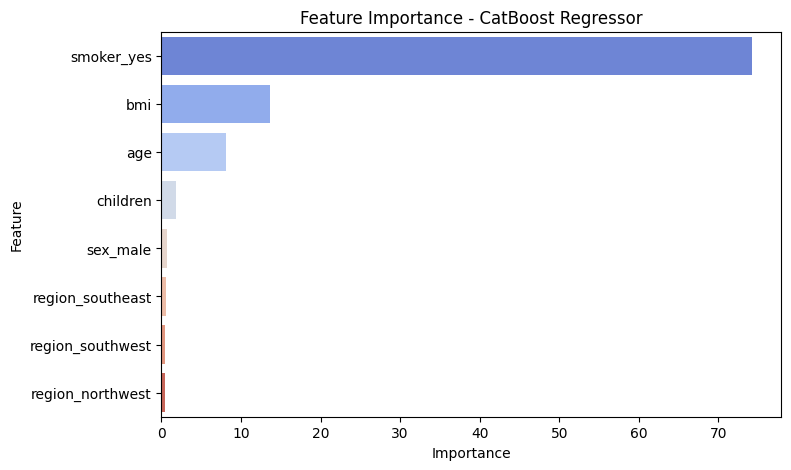

In [ ]:
# 📌 Display feature importance graph
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='coolwarm')
plt.title("Feature Importance - CatBoost Regressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()